# 데이터프레임 응용하기
- 데이터 프레임에 함수 매핑
- 데이터 집계를 위한 그룹연산
- 데이터 프레임의 구조 변경

## 개별 원소에 함수 매핑하기
### 시리즈 원소에 함수 매핑하기
- 시리즈객체에 apply()메서드 사용
- 인자로 전달된 함수를 모든 원소에 매핑하여 새로운 시리즈 반환


In [1]:
# # 라이브러리 불러오기
# import seaborn as sns

# # titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
# titanic = sns.load_dataset('titanic')
# df = titanic.loc[:, ['age','fare']]
# df['ten'] = 10
# df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


In [2]:
# 사용자 함수 정의
def add_10(n):   # 10을 더하는 함수
    return n + 10

def add_two_obj(a, b):    # 두 객체의 합
    return a + b

print(add_10(10))
print(add_two_obj(10, 10))

20
20


#### age열에 add_10함수를 일괄 적용

In [3]:
# sr1 = df['age'].apply(add_10)
# sr1.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

#### age열에 add_two_obj 함수 적용
- 함수 인자가 두 개 이상인 경우 함수 뒤에 인자를 나열

In [4]:
# sr2 = df['age'].apply(add_two_obj, b=10)
# sr2.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [5]:
# sr2 = df['age'].apply(add_two_obj, b=10)
# sr2.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

#### 람다식 활용

In [6]:
# sr3 = df['age'].apply(lambda x: add_10(x))
# sr3.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [7]:
# sr3 = df['age'].apply(lambda x:x + 10)
# sr3.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

### 데이터프레임 원소에 함수 매핑
- applymap() 메서드에 매핑함수를 전달하여 사용
- 데이터프레임의 각 원소를 매핑 함수에 하나씩 넣어서 반환값으로 돌려 받음
- 원소의 원래 위치에 매핑 함수의 반환값을 저장하여 동일한 형태의 데이터프레임 생성

In [8]:
# # 라이브러리 불러오기
# import seaborn as sns

# # titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
# titanic = sns.load_dataset('titanic')
# df = titanic.loc[:, ['age','fare']]
# df['ten'] = 10
# df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


In [9]:
def add_10(n):   # 10을 더하는 함수
    return n + 10

In [10]:
# # 데이터프레임에 applymap()으로 add_10() 함수를 매핑 적용
# df_map = df.applymap(add_10)   
# df_map.head()

,age,fare,ten
0,32.0,17.2500,20
1,48.0,81.2833,20
2,36.0,17.9250,20
3,45.0,63.1000,20
4,45.0,18.0500,20


## 시리즈 객체에 함수 매핑

### 데이터프레임의 각 열에 함수 매핑
- apply(axis=0) 메서드를 적용하면 모든 열을 하나씩 분리하여 매핑 함수에 적용
- 매핑 함수에 따라 반환되는 객체의 종류가 다름
    - 인자:시리즈, 반환:시리즈 => 데이터프레임 반환
    - 인자:시리즈, 반환:단일값 => 시리즈 반환

In [11]:
# # 라이브러리 불러오기
# import seaborn as sns

# # titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
# titanic = sns.load_dataset('titanic')
# df = titanic.loc[:, ['age','fare']]
# df['ten'] = 10
# df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


##### 시리즈를 입력 받아 시리즈를 반환하는 메서드는 데이터프레임 반환

In [12]:
# 사용자 함수 정의(isnull() 누락데이터 판별 (True, False))
def missing_value(series):    # 시리즈를 인수로 전달
    return series.isnull()    # 불린 시리즈를 반환

In [13]:
# result = df.apply(missing_value, axis=0)  
# result.head()

,age,fare,ten
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


##### 시리즈를 입력 받아 하나의 값을 반환하는 함수를 매핑하면 시리즈를 반환

In [14]:
# 사용자 함수 정의
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()

In [15]:
# result = df.apply(min_max)   #기본값 axis=0 
# result

age      79.5800
fare    512.3292
ten       0.0000
dtype: float64

##### 이해하기
- 각 열의 이름이 시리즈의 인덱스가 됨
- 함수가 반환하는 값이 각 인덱스에 매칭되는 데이터 값이 됨

### 데이터프레임의 각 행에 함수 매핑
- apply(axis=1) 메서드 적용
- 각 행을 매핑 함수의 인자로 전달하고 시리즈를 반환
- 반환되는 시리즈의 인덱스는 데이터프레임의 행 인덱스가 적용됨
- 시리즈의 인덱스에 매칭되는 데이터 값에는 각 행의 데이터를 함수에 적용한 반환값

In [16]:
# # 라이브러리 불러오기
# import seaborn as sns

# # titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
# titanic = sns.load_dataset('titanic')
# df = titanic.loc[:, ['age','fare']]
# df['ten'] = 10
# df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


In [17]:
# 사용자 함수 정의
def add_two_obj(a, b):    # 두 객체의 합
    return a + b   

In [18]:
# # x=df, a=df['age'], b=df['ten']
# df['add'] = df.apply(lambda x: add_two_obj(x['age'], x['ten']), axis=1)   
# df.head()

,age,fare,ten,add
0,22.0,7.2500,10,32.0
1,38.0,71.2833,10,48.0
2,26.0,7.9250,10,36.0
3,35.0,53.1000,10,45.0
4,35.0,8.0500,10,45.0


## 데이터프레임 객체에 함수 매핑
- pipe() 메서드에 인자로 매핑 함수를 전달하여 적용
- 매핑 함수가 반환하는 값에 따라 pipe()의 반환 객체 종류가 결정됨
	- 데이터프레임을 반환하는 경우
	- 시리즈를 반환하는 경우
	- 개별 값을 반환하는 경우

In [19]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [20]:
# 각 열의 NaN 찾기 - 데이터프레임 전달하면 데이터프레임을 반환
def missing_value(x):    
    return x.isnull()    

# 각 열의 NaN 개수 반환 - 데이터프레임 전달하면 시리즈 반환
def missing_count(x):    # 
    return missing_value(x).sum()

# 데이터프레임의 총 NaN 개수 - 데이터프레임 전달하면 값을 반환
def totoal_number_missing(x):    
    return missing_count(x).sum()

In [21]:
# # 데이터프레임에 pipe() 메소드로 함수 매핑
# result_df = df.pipe(missing_value)   
# print(result_df.head())
# print(type(result_df))

     age   fare
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False
<class 'pandas.core.frame.DataFrame'>


In [22]:
# result_series = df.pipe(missing_count)   
# print(result_series)
# print(type(result_series))

age     177
fare      0
dtype: int64
<class 'pandas.core.series.Series'>


In [23]:
# result_value = df.pipe(totoal_number_missing)   
# print(result_value)
# print(type(result_value))

177
<class 'numpy.int64'>


# 데이터프레임 열 재구성
### 열 순서 변경

In [24]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋의 부분을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[0:4, 'survived':'age']
df

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [25]:
# # 열 이름의 리스트 만들기
# columns = list(df.columns.values)   #기존 열 이름
# columns

['survived', 'pclass', 'sex', 'age']

In [26]:
# # 열 이름을 알파벳 순으로 정렬하기
# columns_sorted = sorted(columns)    #알파벳 순으로 정렬
# df_sorted = df[columns_sorted] # 데이터 프레임에서 리스트로 열을 선택
# df_sorted

,age,pclass,sex,survived
0,22.0,3,male,0
1,38.0,1,female,1
2,26.0,3,female,1
3,35.0,1,female,1
4,35.0,3,male,0


In [27]:
# # 열 이름을 기존 순서의 정반대 역순으로 정렬하기
# columns_reversed = list(reversed(columns))  
# df_reversed = df[columns_reversed]
# df_reversed

,age,sex,pclass,survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0


In [28]:
# # 열 이름을 사용자가 정의한 임의의 순서로 재배치하기
# columns_customed = ['pclass', 'sex', 'age', 'survived']  
# df_customed = df[columns_customed]
# df_customed

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


### 열 분리하기
- 하나의 열이 여러 정보를 담고 있을 때 각 정보를 분리  
        예) 년월일

In [29]:
# 라이브러리 불러오기
import pandas as pd

# 데이터셋 가져오기
df = pd.read_excel('./주가데이터.xlsx', engine= 'openpyxl')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [30]:
df.dtypes

연월일     datetime64[ns]
당일종가             int64
전일종가             int64
시가               int64
고가               int64
저가               int64
거래량              int64
dtype: object

In [31]:
# # 연, 월, 일 데이터 분리하기
# df['연월일'] = df['연월일'].astype('str')   # 문자열 메소드 사용을 자료형 변경
# dates = df['연월일'].str.split('-')        # 문자열을 split() 메서드로 분리
# dates.head()

0    [2018, 07, 02]
1    [2018, 06, 29]
2    [2018, 06, 28]
3    [2018, 06, 27]
4    [2018, 06, 26]
Name: 연월일, dtype: object

In [32]:
# # 분리된 정보를 각각 새로운 열에 담아서 df에 추가하기
# df['연'] = dates.str.get(0)     # dates 변수의 원소 리스트의 0번째 인덱스 값
# df['월'] = dates.str.get(1)     # dates 변수의 원소 리스트의 1번째 인덱스 값 
# df['일'] = dates.str.get(2)     # dates 변수의 원소 리스트의 2번째 인덱스 값
# df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연,월,일
0,2018-07-02,10100,600,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018,06,26


# 필터링
- 시리즈나 데이터프레임에서 특정 조건에 만족하는 원소만 추출

### 불린 인덱싱
- 시리즈 객체에 조건식을 적용하여 각 원소의 참/거짓의 결과로 구성된 시리즈 반환
- 참에 해당하는 데이터 값을 따로 선택 가능
- 많은 데이터 중 특정 조건을 만족하는 데이터만 추출하는 필터링 기법의 한 유형
- 데이터프레임의 각 열은 시리즈객체
- 조건식(<, >, == 등)을 적용
- 시리즈를 데이터프레임에 대입하여 조건을 만족하는 행들만 선택 가능

In [33]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 로딩
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 나이대로 필터링

In [34]:
titanic.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [35]:
# titanic.age >= 10

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: age, Length: 891, dtype: bool

In [36]:
# # 나이가 10대(10~19세)인 승객만 따로 선택
# mask1 = (titanic.age >= 10) & (titanic.age < 20)
# df_teenage = titanic.loc[mask1, :]
# df_teenage.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


#### 나이대와 성별로 필터링

In [37]:
# # 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택
# mask2 = (titanic.age < 10) & (titanic.sex == 'female')
# df_female_under10 = titanic.loc[mask2, :]
# df_female_under10.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


In [38]:
# # 나이가 10세 미만(0~9세) 또는 60세 이상인 승객의 age, sex, alone 열만 선택
# mask3 = (titanic.age < 10) | (titanic.age >= 60)
# df_under10_morethan60 = titanic.loc[mask3, ['age', 'sex', 'alone']]
# df_under10_morethan60.head()

,age,sex,alone
7,2.0,male,False
10,4.0,female,False
16,2.0,male,False
24,8.0,female,False
33,66.0,male,True


#### isin() 
- 특정 값을 가진 행들만 따로 추출
- isin()메서드의 인자로 데이터프레임 열에서 추출하려는 값들로 만든 리스트를 전달

In [39]:
# 라이브러리 불러오기
import seaborn as sns
import pandas as pd

# titanic 데이터셋 로딩
titanic = sns.load_dataset('titanic')


# IPyhton 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option('display.max_columns', 15) 
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### 불린 인덱싱으로 필터링

In [40]:
# # 함께 탑승한 형제 또는 배우자의 수가 3, 4, 5인 승객만 따로 추출 - 불린 인덱싱
# mask3 = titanic['sibsp'] == 3
# mask4 = titanic['sibsp'] == 4
# mask5 = titanic['sibsp'] == 5
# df_boolean = titanic[mask3 | mask4 | mask5]
# df_boolean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False


#### isin()메서드로 필터링

In [41]:
# # isin() 메서드 활용하여 동일한 조건으로 추출
# isin_filter = titanic['sibsp'].isin([3, 4, 5])
# df_isin = titanic[isin_filter]
# df_isin.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False


# 데이터프레임 합치기
- 여러 데이터프레임을 합치거나 연결하기
        - concat()
        - merge()
        - join()

### 데이터프레임 연결하기
- concat()
- 서로 다른 데이터프레임의 구성 형태와 속성이 균일 할 때 기존 데이터프레임 형태를 일관되게 유지하면서 이어 붙이는 것


In [42]:
# 라이브러리 불러오기
import pandas as pd

# 데이터프레임 만들기
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

In [43]:
df1

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a3,b3,c3


In [44]:
df2

,a,b,c,d
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [45]:
# # 2개의 데이터프레임을 위 아래 행 방향으로 이어 붙이듯 연결하기 
# result1 = pd.concat([df1, df2])
# result1

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


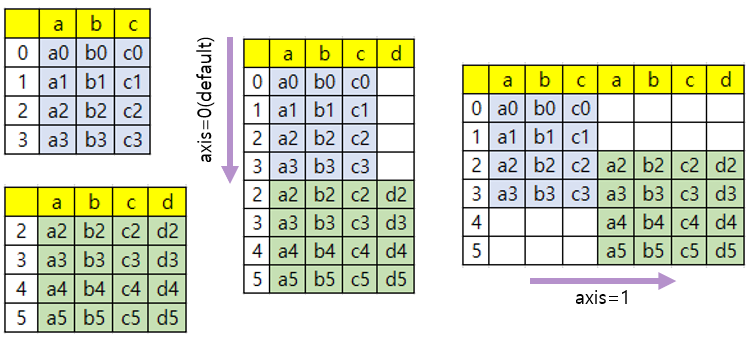

In [46]:
# # ignore_index=True 옵션 설정하기(인덱스를 새로 적용)
# result2 = pd.concat([df1, df2], ignore_index=True)
# result2

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
4,a2,b2,c2,d2
5,a3,b3,c3,d3
6,a4,b4,c4,d4
7,a5,b5,c5,d5


In [47]:
# # 2개의 데이터프레임을 좌우 열 방향으로 이어 붙이듯 연결하기 
# result3 = pd.concat([df1, df2], axis=1)
# result3

,a,b,c,a,b,c,d
0,a0,b0,c0,NaN,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN,NaN
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
4,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,a5,b5,c5,d5


In [48]:
# # join='inner' 옵션 적용하기(교집합)
# result3_in = pd.concat([df1, df2], axis=1, join='inner')
# result3_in

,a,b,c,a,b,c,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


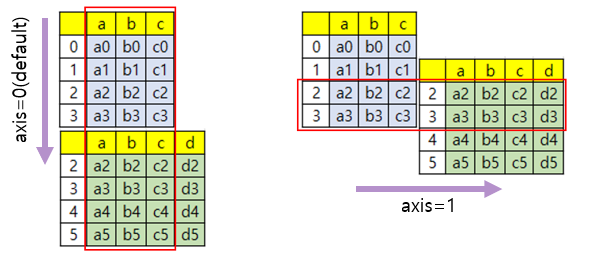

#### 데이터프레임에 시리즈 합치기

In [49]:
# # 시리즈 만들기
# sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')
# sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3, 4, 5])
# sr3 = pd.Series(['g0', 'g1', 'g2', 'g3'], name='g')

# print(sr1)
# print(sr2)
# print(sr3)

0    e0
1    e1
2    e2
3    e3
Name: e, dtype: object
3    f0
4    f1
5    f2
Name: f, dtype: object
0    g0
1    g1
2    g2
3    g3
Name: g, dtype: object


In [50]:
# # df1과 sr1을 좌우 열 방향으로 연결하기
# result4 = pd.concat([df1, sr1], axis=1)
# result4

,a,b,c,e
0,a0,b0,c0,e0
1,a1,b1,c1,e1
2,a2,b2,c2,e2
3,a3,b3,c3,e3


In [51]:
# # df2과 sr2을 좌우 열 방향으로 연결하기
# result5 = pd.concat([df2, sr2], axis=1, sort=True)
# result5

,a,b,c,d,f
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,f0
4,a4,b4,c4,d4,f1
5,a5,b5,c5,d5,f2


In [52]:
# # sr1과 sr3을 좌우 열 방향으로 연결하기
# result6 = pd.concat([sr1, sr3], axis=1)
# result6

,e,g
0,e0,g0
1,e1,g1
2,e2,g2
3,e3,g3


In [53]:
# # 시리즈에 시리즈를 행 방향으로 연결
# result7 = pd.concat([sr1, sr3], axis=0)
# result7

0    e0
1    e1
2    e2
3    e3
0    g0
1    g1
2    g2
3    g3
dtype: object

### 데이터프레임 병합
- merge() 메서드 사용
- SQL의 join과 비슷한 방식으로 특정 기준에 따라 두 데이터프레임을 병합
- 기준이 되는 열 또는 인덱스를 키(key)라고 함
- 키가 되는 열이나 인덱스는 반드시 병합할 데이터프레임에 모두 존재해야 함


- 데이터 준비
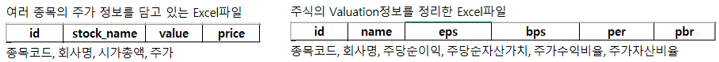

In [54]:
# 라이브러리 불러오기
import pandas as pd

# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./stock price.xlsx')
df2 = pd.read_excel('./stock valuation.xlsx')

In [55]:
df1

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200
5,145990,삼양사,82750.000000,82000
6,185750,종근당,40293.666667,100500
7,192400,쿠쿠홀딩스,179204.666667,177500
8,199800,툴젠,-2514.333333,115400
9,204210,모두투어리츠,3093.333333,3475


In [56]:
df2

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


#### merge()
- on=None, how='inner'  디폴트 옵션으로 적용
- on=None옵션은 두 데이터프레임에 공통으로 속하는 모든 열을 기준으로 병합
- how='inner' 옵션은 기준이 되는 열의 데이터가 공통으로 존재하는 교집합만 추출
- 다음 예제는 id열을 기준으로 공통으로 존재하는 5개 종목에 대해 병합

In [57]:
# # 데이터프레임 합치기 - 교집합
# merge_inner = pd.merge(df1, df2)
# merge_inner

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [58]:
# # 데이터프레임 합치기 - 합집합
# merge_outer = pd.merge(df1, df2, how='outer', on='id')
# merge_outer

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [59]:
# # 데이터프레임 합치기 - 왼쪽 데이터프레임 기준, 키 값 분리
# merge_left = pd.merge(df1, df2, how='left', left_on='stock_name', right_on='name')
# merge_left

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,130960.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500,139480.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000,145990.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500,185750.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475,204210.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [60]:
# # 데이터프레임 합치기 - 오른쪽 데이터프레임 기준, 키 값 분리
# merge_right = pd.merge(df1, df2, how='right', left_on='stock_name', right_on='name')
# merge_right

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,130960.0,CJ E&M,58540.666667,98900.0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,NaN,NaN,NaN,NaN,136480,하림,274.166667,3551,11.489362,0.887074
2,NaN,NaN,NaN,NaN,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480.0,이마트,239230.833333,254500.0,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990.0,삼양사,82750.000000,82000.0,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,NaN,NaN,NaN,NaN,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,NaN,NaN,NaN,NaN,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750.0,종근당,40293.666667,100500.0,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210.0,모두투어리츠,3093.333333,3475.0,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,NaN,NaN,NaN,NaN,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [61]:
# # 불린 인덱싱과 결합하여 원하는 데이터 찾기
# price = df1[df1['price'] < 50000]
# price

,id,stock_name,value,price
2,138250,엔에스쇼핑,14558.666667,13200
4,142280,녹십자엠에스,468.833333,10200
9,204210,모두투어리츠,3093.333333,3475


In [62]:
df2

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [63]:
# value = pd.merge(price, df2)
# value

,id,stock_name,value,price,name,eps,bps,per,pbr
0,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


### 데이터프레임 결합
- merge()메서드를 기반으로 만들어진 join()을 사용
- 기본 작동이 merge()와 비슷함
- join()은 기본적으로 두 데이터프레임의 행 인덱스를 기준으로 결합
- on=keys옵션을 이용하면 다른 열 선택 가능


In [64]:
# 라이브러리 불러오기
import pandas as pd

# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./stock price.xlsx', index_col='id')
df2 = pd.read_excel('./stock valuation.xlsx', index_col='id')

In [65]:
df1

,stock_name,value,price
id,,,
128940,한미약품,59385.666667,421000
130960,CJ E&M,58540.666667,98900
138250,엔에스쇼핑,14558.666667,13200
139480,이마트,239230.833333,254500
142280,녹십자엠에스,468.833333,10200
145990,삼양사,82750.000000,82000
185750,종근당,40293.666667,100500
192400,쿠쿠홀딩스,179204.666667,177500
199800,툴젠,-2514.333333,115400


In [66]:
df2

,name,eps,bps,per,pbr
id,,,,,
130960,CJ E&M,6301.333333,54068,15.695091,1.829178
136480,하림,274.166667,3551,11.489362,0.887074
138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
139480,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,5741.000000,108090,14.283226,0.758627
161390,한국타이어,5648.500000,51341,7.453306,0.820007
181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
185750,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,85.166667,5335,40.802348,0.651359


In [67]:
# # 데이터프레임 결합(join)
# df3 = df1.join(df2)
# df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN


In [68]:
# # 데이터프레임 결합(join) - 교집합
# df4 = df1.join(df2, how='inner')
# df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


# 그룹연산

- 복잡한 데이터를 기준에 따라 그룹으로 나누어 처리하는 것
- 데이터 집계, 변환, 필터링하는데 효율적


- 다음 3단계의 과정을 진행
	1. 분할(split): 데이터를 특정 조건에 의해 분할
	2. 적용(apply): 데이터를 집계, 변환, 필터링하는데 필요한 메서드 적용
	3. 결합(combine): 2단계 처리 결과를 하나로 결합


In [69]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

print('승객 수:', len(df))
df.head()

승객 수: 891


,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


#### 1개의 열을 기준으로 그룹화

In [70]:
# # class 열을 기준으로 분할
# grouped = df.groupby(['class']) 
# type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [71]:
# # 그룹 객체를 iteration으로 출력: head() 메소드로 첫 5행만을 출력
# for key, group in grouped:
#     print('* key :', key)
#     print('* number :', len(group))    
#     print(group.head())
#     print('\n')

* key : First
* number : 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1


* key : Second
* number : 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


* key : Third
* number : 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0




In [72]:
# # 연산 메소드 적용
# average = grouped.mean()
# average

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [73]:
# # 개별 그룹 선택하기
# group3 = grouped.get_group('Third')
# group3.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0


#### 여러 열을 기준으로 그룹화하기

In [74]:
# # class 열, sex 열을 기준으로 분할
# grouped_two = df.groupby(['class', 'sex']) 

# # grouped_two 그룹 객체를 iteration으로 출력
# for key, group in grouped_two:
#     print('* key :', key)
#     print('* number :', len(group))    
#     print(group.head())
#     print('\n')

* key : ('First', 'female')
* number : 94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1


* key : ('First', 'male')
* number : 122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0


* key : ('Second', 'female')
* number : 76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1


* key : ('Second', 'male')
* number : 108
     age   sex   class  fare  survived
17   Na

##### 결과
- 선택한 컬럼들의 모든 원소들로 조합하여 그룹화 결과가 만들어짐

In [75]:
# # grouped_two 그룹 객체에 연산 메소드 적용
# average_two = grouped_two.mean()
# print(type(average_two))
# average_two

<class 'pandas.core.frame.DataFrame'>


age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [76]:
# # grouped_two 그룹 객체에서 개별 그룹 선택하기
# group3f = grouped_two.get_group(('Third','female'))
# group3f.head()

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0


### 데이터 집계
- 분할한 그룹 객체에 대해 평균 이외에도 각 그룹별로 다양한 연산 적용 가능
- 집계 기능을 가진 판다스 내장 함수  
mean()
max()
min()
sum()
count()
size()
var()
str()
describe()
info()
first()
last()
등등  


#### 표준편차를 이용하여 테스트

In [77]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 
grouped.get_group('Second')

,age,sex,class,fare,survived
9,14.0,female,Second,30.0708,1
15,55.0,female,Second,16.0000,1
17,NaN,male,Second,13.0000,1
20,35.0,male,Second,26.0000,0
21,34.0,male,Second,13.0000,1
...,...,...,...,...,...
866,27.0,female,Second,13.8583,1
874,28.0,female,Second,24.0000,1
880,25.0,female,Second,26.0000,1
883,28.0,male,Second,10.5000,0


In [78]:
# # 각 그룹에 대한 모든 열의 표준편차를 집계하여 데이터프레임으로 반환
# std_all = grouped.std()
# std_all

,age,fare,survived
class,,,
First,14.802856,78.380373,0.484026
Second,14.001077,13.417399,0.500623
Third,12.495398,11.778142,0.428949


In [79]:
# # 각 그룹에 대한 fare 열의 표준편차를 집계하여 시리즈로 반환 
# std_fare = grouped.fare.std()  
# std_fare

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

#### agg()함수
- 집계 연산을 처리하는 사용자 정의 함수를 그룹 객체에 적용


In [80]:
# 그룹 객체에 agg() 메소드 적용 - 사용자 정의 함수를 인수로 전달
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()

In [81]:
# # 각 그룹의 최대값과 최소값의 차이를 계산하여 그룹별로 집계
# agg_minmax = grouped.agg(min_max)  
# agg_minmax.head()

C:\Users\itthi\AppData\Local\Temp\ipykernel_980\3215156336.py:2: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_minmax = grouped.agg(min_max)


,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


- 한 번에 여러 집계함수를 사용할 수 있음
- 열마나 동일한 함수들을 일괄적으로 적용 시 리스트 전달
- 열마나 다른 함수를 적용하는 경우 딕셔너리 전달

In [82]:
# # 여러 함수를 각 열에 동일하게 적용하여 집계
# agg_all = grouped.agg(['min', 'max'])  
# agg_all.head()

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [83]:
# # 각 열마다 다른 함수를 적용하여 집계
# agg_sep = grouped.agg({'fare':['min', 'max'], 'age':'mean'})  
# agg_sep.head()

fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620

### 그룹연산 데이터 변환
- age열에 포함된 개별 데이터의 z-score를 구하는 과정 확인

#### z-score(표준화 점수)란
- 측정단위가 다른건과 환산하여 직접적인 비교를 가능하게 만드는 방법
- 평균과 표준편차를 사용하여 구함
- 표준편차를 단위로 봤을 때 측정치가 평균에서 얼만큼 떨어져 있는가를 보는 것
        z-score = 측정치X - 평균치M / 표준편차

In [84]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

In [85]:
# # 그룹별 age 열의 평균 집계 연산
# age_mean = grouped.age.mean()
# age_mean

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [86]:
# # 그룹별 age 열의 표준편차 집계 연산
# age_std = grouped.age.std()
# age_std

class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64

In [87]:
# # 그룹 객체의 age 열을 iteration으로 z-score를 계산하여 출력
# for key, group in grouped.age:
#     group_zscore = (group - age_mean.loc[key]) / age_std.loc[key]         
#     print('* origin :', key)
#     print(group_zscore.head(3))  # 각 그룹의 첫 3개의 행을 출력
#     print('\n')

* origin : First
1   -0.015770
3   -0.218434
6    1.065103
Name: age, dtype: float64


* origin : Second
9    -1.134029
15    1.794317
17         NaN
Name: age, dtype: float64


* origin : Third
0   -0.251342
2    0.068776
4    0.789041
Name: age, dtype: float64




In [88]:
# z-score를 계산하는 사용자 함수 정의
def z_score(x): 
    return (x - x.mean()) / x.std()

In [89]:
# # transform() 메소드를 이용하여 age 열의 데이터를 z-score로 변환
# age_zscore = grouped.age.transform(z_score)  
# type(age_zscore)

pandas.core.series.Series

In [90]:
age_zscore

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [91]:
#1, 2, 3 그룹의 첫 데이터 확인 (변환 결과)
age_zscore.loc[[1, 9, 0]]

1   -0.015770
9   -1.134029
0   -0.251342
Name: age, dtype: float64

In [92]:
age_zscore.loc[0:9]

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
5         NaN
6    1.065103
7   -1.851931
8    0.148805
9   -1.134029
Name: age, dtype: float64

##### 결과
- 각 그룹별 평균과 표준편차를 이용하여 각 원소의 z-score를 계산
- 반환 객체를 그룹별로 나누지 않고 원래 행 인덱스 순서로 정렬됨
- 891명 승객의 데이터가 원래 행 인덱스 순서대로 정렬됨

### 그룹객체 필터링
- 그룹객체.filter(조건식 함수)
- 조건이 참인 그룹만 남김


#### 데이터 개수가 200개 이상인 그룹만 필터링
- 'class'열을 기준으로 구분된 3개의 그룹 중 조건을 충족하는 'First', 'Third' 그룹만 추출됨

In [93]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

In [94]:
# # 데이터 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환
# grouped_filter = grouped.filter(lambda x: len(x) >= 200)  
# grouped_filter.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [95]:
# # age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환
# age_filter = grouped.filter(lambda x: x.age.mean() < 30)  
# age_filter.tail()

,age,sex,class,fare,survived
884,25.0,male,Third,7.050,0
885,39.0,female,Third,29.125,0
886,27.0,male,Second,13.000,0
888,NaN,female,Third,23.450,0
890,32.0,male,Third,7.750,0


#### 그룹객체에 함수 매핑 하기
- apply()메서드는 판다스 객체의 개별 원소를 특정 함수에 일대일 매핑
- 이를 그룹객체를 대상으로 적용 가능

In [96]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

In [97]:
# # 집계 : 각 그룹별 요약 통계정보를 집계
# agg_grouped = grouped.apply(lambda x: x.describe())   
# agg_grouped

age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.495398   11.778142    0.428949
       min      0.420000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000
       50%     24.000000    8.050000    0.000000
       75%     32.000000   15.500000    0.000000
       max     74.000000   69.550000    1.000000

In [98]:
# z-score를 계산하는 사용자 함수 정의
def z_score(x):                          
    return (x - x.mean()) / x.std()

In [99]:
# age_zscore = grouped.age.apply(z_score)   #기본값 axis=0 
# age_zscore.head()

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
Name: age, dtype: float64

#### 필터링 : age 열의 데이터 평균이 30보다 작은 그룹만을 필터링하여 출력

In [100]:
# age_filter = grouped.apply(lambda x: x.age.mean() < 30)  
# age_filter

class
First     False
Second     True
Third      True
dtype: bool

In [101]:
age_filter.index

CategoricalIndex(['First', 'Second', 'Third'], categories=['First', 'Second', 'Third'], ordered=False, dtype='category', name='class')

In [102]:
print(age_filter['First'])
print(age_filter['Second'])

False
True


In [103]:
# for x in age_filter.index:
#     if age_filter[x]==True:
#         age_filter_df = grouped.get_group(x)
#         print('Group:', x)
#         print(age_filter_df.head())
#         print('\n')

Group: Second
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


Group: Third
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0




### 멀티 인덱스
- groupby() 메서드에 여러 열을 리스트로 전달 시 각 열들이 다중으로 행 인덱스를 구성함
- 판다스는 행 인덱스를 여러 레벨로 구현할 수 있는 멀티 인덱스 클래스를 지원

In [104]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열, sex 열을 기준으로 분할
grouped = df.groupby(['class', 'sex'])

In [105]:
# 그룹 객체에 연산 메서드 적용
gdf = grouped.mean()
gdf

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [106]:
# class 값이 First인 행을 선택하여 출력
gdf.loc['First']

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


In [107]:
# # class 값이 First이고, sex 값이 female인 행을 선택하여 출력
# gdf.loc[('First', 'female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

In [108]:
# # sex 값이 male인 행을 선택하여 출력
# gdf.xs('male', level='sex')

,age,fare,survived
class,,,
First,41.281386,67.226127,0.368852
Second,30.740707,19.741782,0.157407
Third,26.507589,12.661633,0.135447


## 피벗(pivot)
- Excel의 피벗테이블과 비슷한 기능을 처리
- 피벗 테이블을 구성하는 4가지 요소
	- 행 인덱스
	- 열 인덱스
	- 데이터 값
	- 데이터 집계함수

In [109]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)    # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)    # 출력할 열의 너비

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [110]:
# # 행, 열, 값, 집계에 사용할 열을 1개씩 지정 - 평균 집계
# pdf1 = pd.pivot_table(df,              # 피벗할 데이터프레임
#                      index='class',    # 행 위치에 들어갈 열
#                      columns='sex',    # 열 위치에 들어갈 열
#                      values='age',     # 데이터로 사용할 열
#                      aggfunc='mean')   # 데이터 집계 함수

# pdf1.head()

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [111]:
# # 값에 적용하는 집계 함수를 2개 이상 지정 가능 - 생존율, 생존자 수 집계
# pdf2 = pd.pivot_table(df,                       # 피벗할 데이터프레임
#                      index='class',             # 행 위치에 들어갈 열
#                      columns='sex',             # 열 위치에 들어갈 열
#                      values='survived',         # 데이터로 사용할 열
#                      aggfunc=['mean', 'sum'])   # 데이터 집계 함수

# pdf2.head()

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [112]:
# # 행, 열, 값에 사용할 열을 2개 이상 지정 가능 - 평균 나이, 최대 요금 집계
# pdf3 = pd.pivot_table(df,                       # 피벗할 데이터프레임
#                      index=['class', 'sex'],    # 행 위치에 들어갈 열
#                      columns='survived',        # 열 위치에 들어갈 열
#                      values=['age', 'fare'],    # 데이터로 사용할 열
#                      aggfunc=['mean', 'max'])   # 데이터 집계 함수

# pdf3.head()

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875

#### 행, 열 구조 살펴보기

In [113]:
pdf3.index

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])

In [114]:
pdf3.columns

MultiIndex([('mean',  'age', 0),
            ('mean',  'age', 1),
            ('mean', 'fare', 0),
            ('mean', 'fare', 1),
            ( 'max',  'age', 0),
            ( 'max',  'age', 1),
            ( 'max', 'fare', 0),
            ( 'max', 'fare', 1)],
           names=[None, None, 'survived'])

### xs 인덱서 사용
#### 행 선택(default: axis=0)

In [115]:
pdf3.xs('First')              # 행 인덱스가 First인 행을 선택 

mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292

In [116]:
pdf3.xs(('First', 'female'))   # 행 인덱스가 ('First', 'female')인 행을 선택(한 개 행인 경우 시리즈 반환)

            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64

#### level옵션에 따라 반환 값의 차이
- level=행인덱스
- level이 지정되면 데이터프레임으로 반환

In [117]:
pdf3.xs('male', level='sex')  # 행 인덱스의 sex 레벨이 male인 행을 선택

mean                                    max                \
                age                  fare              age          fare   
survived          0          1          0          1     0     1       0   
class                                                                      
First     44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third     27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                    
                    
survived         1  
class               
First     512.3292  
Second     39.0000  
Third      56.4958

In [118]:
pdf3.xs(('Second', 'male'), level=[0, 'sex'])  # Second, male인 행을 선택(['class', 'sex'], [0, 1] 동일한 개념)

mean                               max                  
                   age               fare            age        fare      
survived             0       1          0        1     0     1     0     1
class  sex                                                                
Second male  33.369048  16.022  19.488965  21.0951  70.0  62.0  73.5  39.0

#### 열 선택(axis=1 설정)

In [119]:
pdf3.xs('mean', axis=1) # 열 인덱스가 mean인 데이터를 선택 

age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696

In [120]:
pdf3.xs(('mean', 'age'), axis=1)   # 열 인덱스가 ('mean', 'age')인 데이터 선택

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211

In [121]:
pdf3.xs(1, level='survived', axis=1)  # survived 레벨이 1인 데이터 선택

mean               max          
                     age        fare   age      fare
class  sex                                          
First  female  34.939024  105.978159  63.0  512.3292
       male    36.248000   74.637320  80.0  512.3292
Second female  28.080882   22.288989  55.0   65.0000
       male    16.022000   21.095100  62.0   39.0000
Third  female  19.329787   12.464526  63.0   31.3875
       male    22.274211   15.579696  45.0   56.4958

In [122]:
pdf3.xs(('max', 'fare', 0), level=[0, 1, 2], axis=1)  # max, fare, survived=0인 데이터 선택

max
                 fare
survived            0
class  sex           
First  female  151.55
       male    263.00
Second female   26.00
       male     73.50
Third  female   69.55
       male     69.55